### Target:
    
    - Add LR Scheduler ReduceLROnPlateau.

### Results:

    - Model has 7979 parameters.

    - Train Accuracy = 98.85

    - Test Accuracy = 99.44

### Analysis:

    - Target achieved: crossed 99.4% validation accuracy 3 times (epochs 11, 14 and 15)


In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 1
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomRotation((-7.0, 7.0), fill=(0,)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

In [7]:
from model import Model4 as Net

model = Net()
model.summary(input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 9, 28, 28]              81
           Dropout-2            [-1, 9, 28, 28]               0
              ReLU-3            [-1, 9, 28, 28]               0
       BatchNorm2d-4            [-1, 9, 28, 28]              18
            Conv2d-5           [-1, 10, 28, 28]             810
           Dropout-6           [-1, 10, 28, 28]               0
              ReLU-7           [-1, 10, 28, 28]               0
         MaxPool2d-8           [-1, 10, 14, 14]               0
       BatchNorm2d-9           [-1, 10, 14, 14]              20
           Conv2d-10           [-1, 16, 14, 14]           1,440
          Dropout-11           [-1, 16, 14, 14]               0
             ReLU-12           [-1, 16, 14, 14]               0
        MaxPool2d-13             [-1, 16, 7, 7]               0
      BatchNorm2d-14             [-1, 1

In [8]:
from utils import train, test

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.5)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test_loss = test(model, device, test_loader, criterion)
  scheduler.step(test_loss)

Epoch 1


Train: Batch Loss=0.4557 Batch_id=937 Average Loss=0.2509 Accuracy=92.71: 100%|██████████| 938/938 [00:16<00:00, 58.27it/s]


Test set: Average loss: 0.0765, Accuracy: 9761/10000 (97.61%)

Epoch 2


Train: Batch Loss=0.0310 Batch_id=937 Average Loss=0.0943 Accuracy=97.12: 100%|██████████| 938/938 [00:15<00:00, 61.75it/s]


Test set: Average loss: 0.0468, Accuracy: 9855/10000 (98.55%)

Epoch 3


Train: Batch Loss=0.0718 Batch_id=937 Average Loss=0.0770 Accuracy=97.69: 100%|██████████| 938/938 [00:15<00:00, 59.69it/s]


Test set: Average loss: 0.0425, Accuracy: 9858/10000 (98.58%)

Epoch 4


Train: Batch Loss=0.0564 Batch_id=937 Average Loss=0.0667 Accuracy=97.97: 100%|██████████| 938/938 [00:16<00:00, 58.43it/s]


Test set: Average loss: 0.0374, Accuracy: 9870/10000 (98.70%)

Epoch 5


Train: Batch Loss=0.0025 Batch_id=937 Average Loss=0.0623 Accuracy=98.06: 100%|██████████| 938/938 [00:16<00:00, 58.61it/s]


Test set: Average loss: 0.0367, Accuracy: 9885/10000 (98.85%)

Epoch 6


Train: Batch Loss=0.0694 Batch_id=937 Average Loss=0.0582 Accuracy=98.21: 100%|██████████| 938/938 [00:15<00:00, 59.24it/s]


Test set: Average loss: 0.0359, Accuracy: 9883/10000 (98.83%)

Epoch 7


Train: Batch Loss=0.0204 Batch_id=937 Average Loss=0.0524 Accuracy=98.34: 100%|██████████| 938/938 [00:15<00:00, 60.18it/s]


Test set: Average loss: 0.0350, Accuracy: 9888/10000 (98.88%)

Epoch 8


Train: Batch Loss=0.0156 Batch_id=937 Average Loss=0.0477 Accuracy=98.49: 100%|██████████| 938/938 [00:15<00:00, 59.96it/s]


Test set: Average loss: 0.0310, Accuracy: 9909/10000 (99.09%)

Epoch 9


Train: Batch Loss=0.0104 Batch_id=937 Average Loss=0.0490 Accuracy=98.52: 100%|██████████| 938/938 [00:15<00:00, 60.41it/s]


Test set: Average loss: 0.0301, Accuracy: 9907/10000 (99.07%)

Epoch 10


Train: Batch Loss=0.0281 Batch_id=937 Average Loss=0.0462 Accuracy=98.56: 100%|██████████| 938/938 [00:15<00:00, 60.24it/s]


Test set: Average loss: 0.0264, Accuracy: 9915/10000 (99.15%)

Epoch 11


Train: Batch Loss=0.0023 Batch_id=937 Average Loss=0.0453 Accuracy=98.60: 100%|██████████| 938/938 [00:15<00:00, 60.16it/s]


Test set: Average loss: 0.0302, Accuracy: 9916/10000 (99.16%)

Epoch 00011: reducing learning rate of group 0 to 5.0000e-03.
Epoch 12


Train: Batch Loss=0.0606 Batch_id=937 Average Loss=0.0380 Accuracy=98.82: 100%|██████████| 938/938 [00:15<00:00, 59.85it/s]


Test set: Average loss: 0.0270, Accuracy: 9918/10000 (99.18%)

Epoch 00012: reducing learning rate of group 0 to 2.5000e-03.
Epoch 13


Train: Batch Loss=0.0464 Batch_id=937 Average Loss=0.0343 Accuracy=98.92: 100%|██████████| 938/938 [00:15<00:00, 59.99it/s]


Test set: Average loss: 0.0231, Accuracy: 9929/10000 (99.29%)

Epoch 14


Train: Batch Loss=0.0034 Batch_id=937 Average Loss=0.0352 Accuracy=98.87: 100%|██████████| 938/938 [00:15<00:00, 59.17it/s]


Test set: Average loss: 0.0217, Accuracy: 9930/10000 (99.30%)

Epoch 15


Train: Batch Loss=0.0040 Batch_id=937 Average Loss=0.0327 Accuracy=98.96: 100%|██████████| 938/938 [00:15<00:00, 59.63it/s]


Test set: Average loss: 0.0226, Accuracy: 9926/10000 (99.26%)

Epoch 00015: reducing learning rate of group 0 to 1.2500e-03.


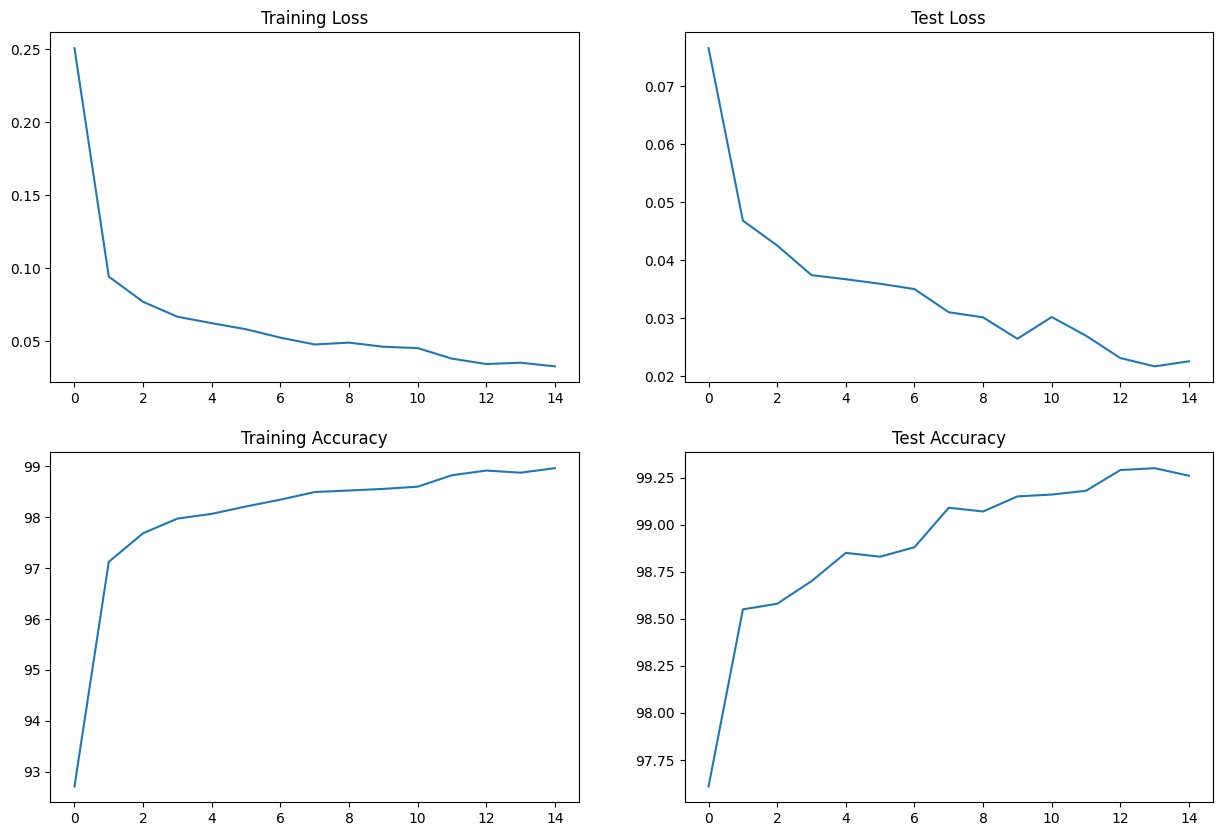

In [10]:
from utils import plot_stats
plot_stats()

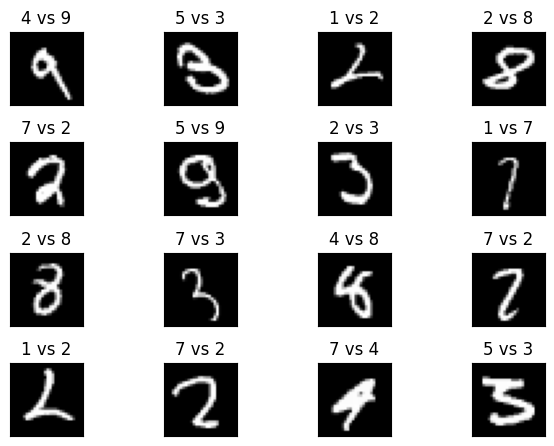

In [11]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual 